In [45]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

In [47]:
bc_data = pd.read_csv('data.csv')

In [48]:
pd.set_option('display.max_columns', None)
bc_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [51]:
bc_data.drop(['id','Unnamed: 32'], axis = 1, inplace = True)


In [52]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [53]:
bc_data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [54]:
bc_data['diagnosis']


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [55]:
bc_data['radius_mean']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64

In [56]:
# Making the diagnosis as numeric
diagnosis_coder = {'M':1, 'B':0}
bc_data.diagnosis = bc_data.diagnosis.map(diagnosis_coder)
bc_data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Number of benign cases: 357
Number of malignant cases: 212


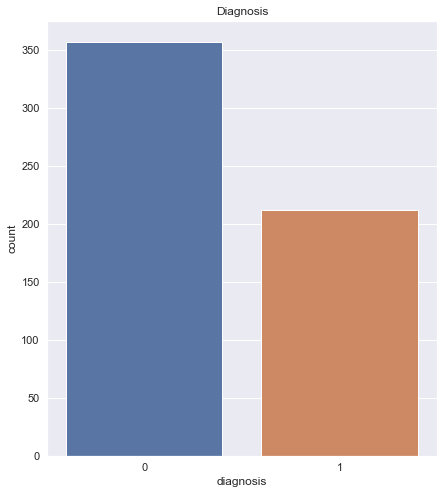

In [57]:
#bc_data['diagnosis'].plot(kind='hist')

sns.set_theme(style='darkgrid')
plt.figure(figsize=(7,8))
ax = sns.countplot(x= bc_data['diagnosis']).set(title='Diagnosis')

benign, malignant = bc_data['diagnosis'].value_counts()

print(f'Number of benign cases: {benign}')
print(f'Number of malignant cases: {malignant}')

In [58]:
pd.Series(bc_data['diagnosis']).value_counts(normalize=True)*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

Text(0.5, 1.0, 'Cancer Diagnosis in Percentage')

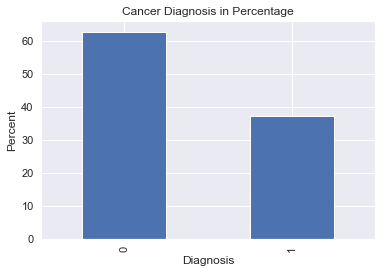

In [59]:
#Total = benign + malignant
#Total
#sns.barplot(x= [benign],y= [malignant],data = bc_data)
ax = (pd.Series(bc_data['diagnosis']).value_counts(normalize=True)*100).plot.bar()
ax.set(ylabel="Percent")
ax.set(xlabel="Diagnosis")
ax.set_title('Cancer Diagnosis in Percentage')


The Perecentage of tumors classified as 'malignant' in this data set is : 37.3 %.

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62.7 % accuracy.

In [60]:
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
diagnosis = bc_data['diagnosis']

In [62]:
type(diagnosis)

pandas.core.series.Series

In [63]:
bc_data.drop(['diagnosis'], axis=1, inplace = True)

In [64]:
bc_data['diagnosis'] = diagnosis 

In [65]:
bc_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [66]:
# Glimpse of tumor features (mean values) in relation to diagnosis

bc_data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


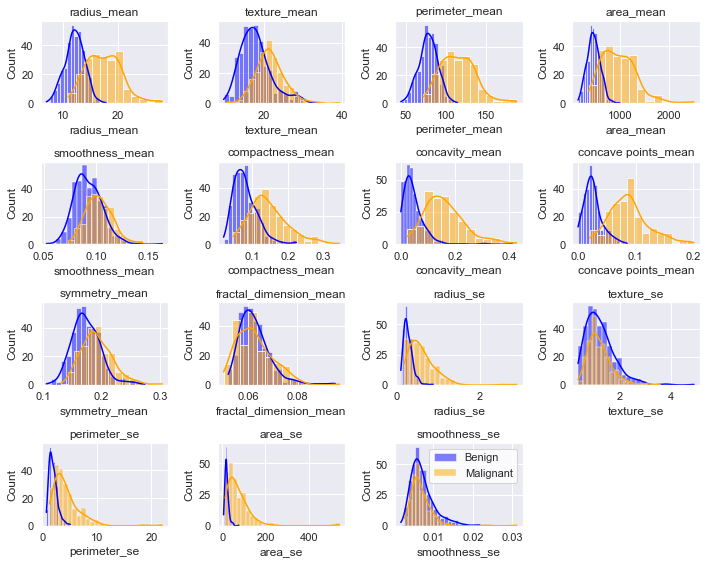

In [67]:
bc_data_n = bc_data[bc_data['diagnosis'] == 0]
bc_data_y = bc_data[bc_data['diagnosis'] == 1]

# Instantiate a figure 
fig = plt.figure(figsize=(10,8))

# Create 'for loop' to enumerate through tumor features and compare with histograms
for i, b in enumerate(list(bc_data.columns[0:15])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,4,i)
    
    # Plot histogram tumor charateristics 
    sns.histplot(bc_data_n[b],kde = 'True', color = 'blue',label ='Benign' )
    sns.histplot(bc_data_y[b],kde = 'True', color = 'orange', label ='Malignant')
    plt.ylim(0,)

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()  



In [68]:
bc_data_n['radius_mean']

19     13.540
20     13.080
21      9.504
37     13.030
46      8.196
        ...  
558    14.590
559    11.510
560    14.050
561    11.200
568     7.760
Name: radius_mean, Length: 357, dtype: float64

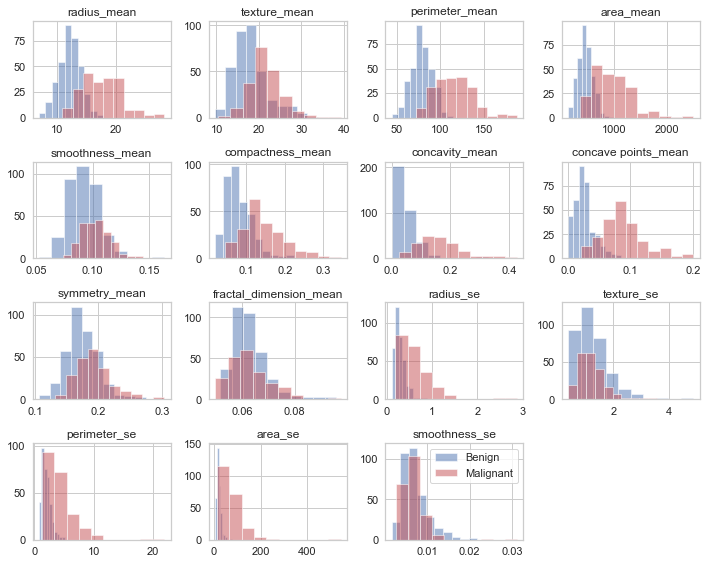

In [69]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure(figsize=(10,8))
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bc_data.columns[0:15])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for comparisons.
    ax.hist(bc_data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bc_data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

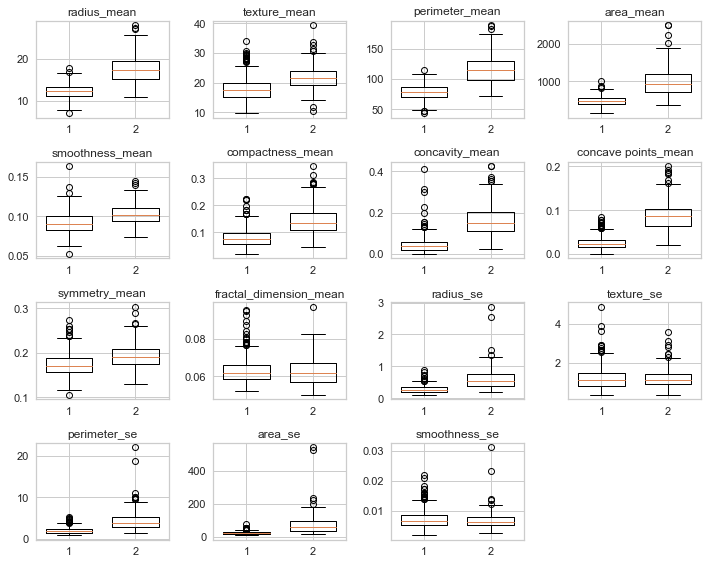

In [70]:
fig = plt.figure(figsize=(10,8))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bc_data.columns[0:15])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,4,i)
    
    # Plot via boxplot tumor charateristics 
    ax.boxplot([bc_data_n[b], bc_data_y[b]],widths=[0.7,0.7])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
#plt.legend(b)
plt.show() 

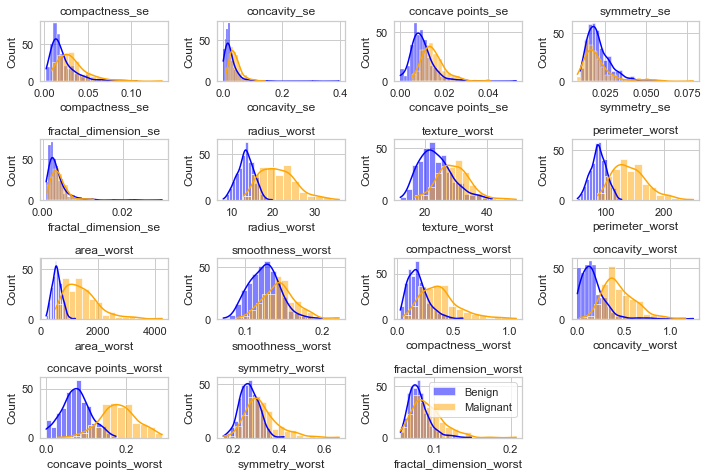

In [71]:
## Instantiate a figure 
fig = plt.figure(figsize=(10,8))

# Create 'for loop' to enumerate through tumor features and compare with histograms
for i, b in enumerate(list(bc_data.columns[15:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(5,4,i)
    
    # Plot histogram tumor charateristics 
    sns.histplot(bc_data_n[b],kde = 'True', color = 'blue',label ='Benign' )
    sns.histplot(bc_data_y[b],kde = 'True', color = 'orange', label ='Malignant')
    plt.ylim(0,)

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()  


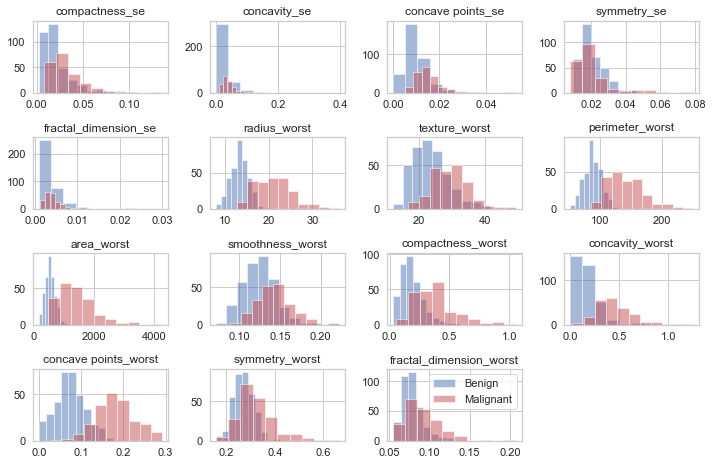

In [72]:
# Instantiate figure object
fig = plt.figure(figsize=(10,8))
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bc_data.columns[15:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(5,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for comparisons.
    ax.hist(bc_data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bc_data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

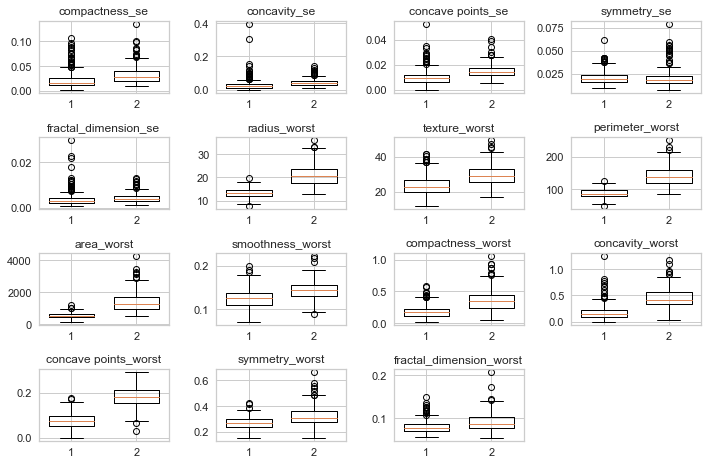

In [73]:
fig = plt.figure(figsize=(10,8))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bc_data.columns[15:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(5,4,i)
    
    # Plot via boxplot tumor charateristics 
    ax.boxplot([bc_data_n[b], bc_data_y[b]],widths=[0.7,0.7])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
#plt.legend(b)
plt.show()

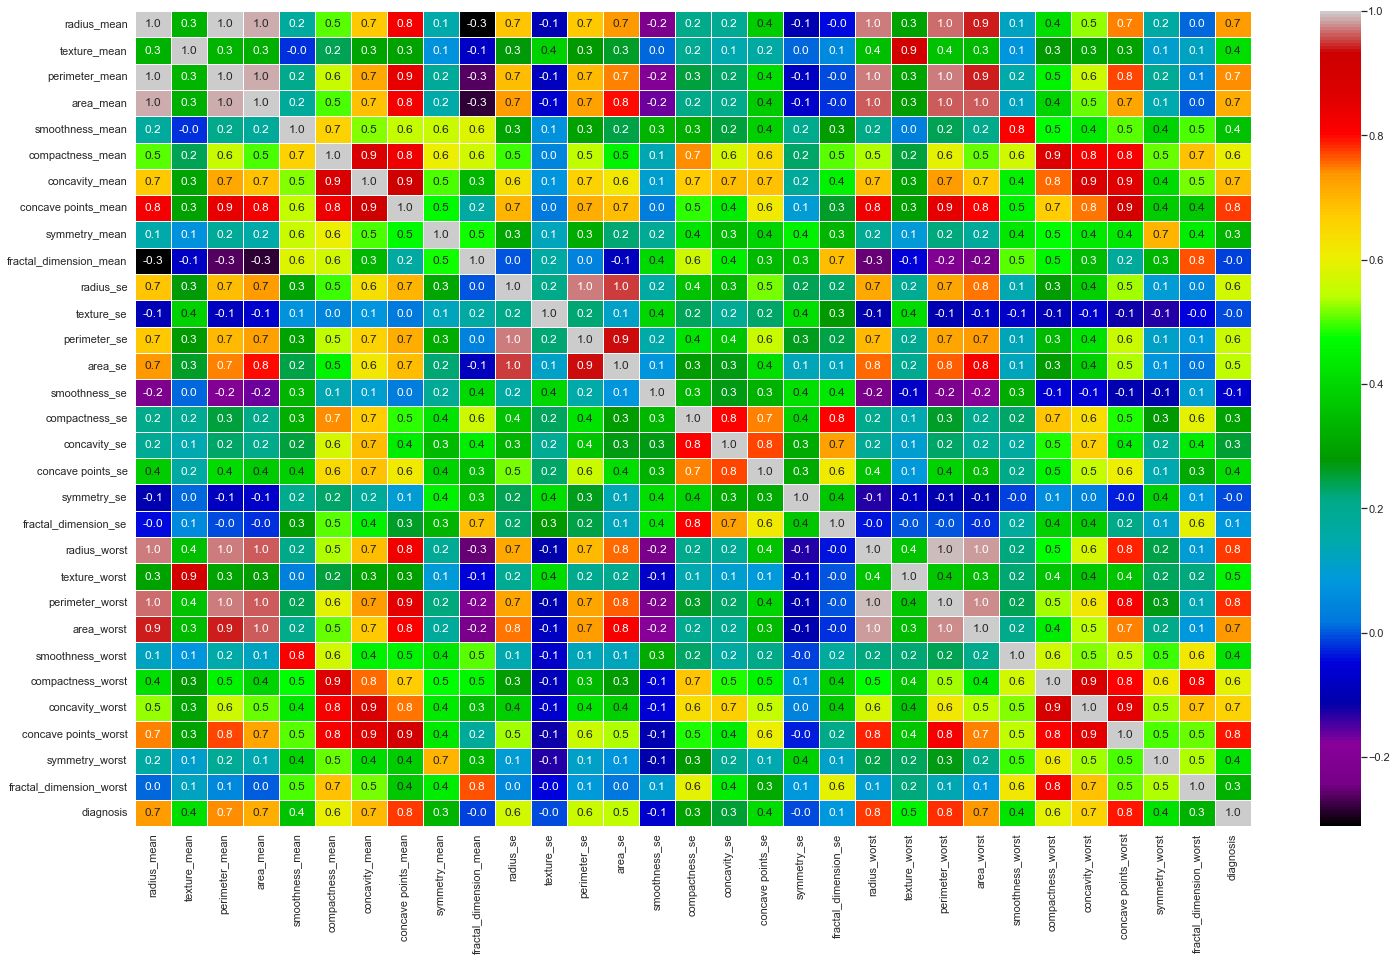

In [74]:
#plt.figure(figsize=(14, 14))
#sns.heatmap(bc_data.corr(), annot=True, linewidths=1.8)
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(bc_data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='nipy_spectral')
#sns.set_style("whitegrid")
plt.show()

As we see, the diagnosis has a low correlation - but positive -  with most of the features. It has negative correlation with few of the features. 

In [86]:
import os
path1 = os.getcwd()

bc_data.to_csv(path1 + '/' + 'bc_data.csv',index=False)


In [88]:
pd.read_csv(path1 + '/'+ 'bc_data.csv')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [89]:
path1


'/home/kc3pve/Desktop/Spring-Git/Springboard/Cancer'